<h1>Customer Churn Prediction using ANN</h1>

In [57]:
import pandas as pd 

In [58]:
dataset=pd.read_csv(r"C:\Users\wwrao\OneDrive\Documents\BankChurners.csv")

In [59]:
dataset.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998


In [60]:
dataset.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"], axis=1, inplace=True)


In [61]:
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.99998


**Remove Columns**

In [62]:
dataset.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],axis=1,inplace=True)

In [63]:
dataset.drop(["Income_Category","CLIENTNUM"],axis=1,inplace=True)

In [64]:
dataset.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [65]:
dataset.isnull().sum().sum()

0

In [66]:
dataset.duplicated().sum().sum()

0

In [67]:
dataset["Education_Level"].value_counts()


Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

In [68]:
dataset["Attrition_Flag"].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

In [70]:
dataset = pd.get_dummies(dataset, columns=["Education_Level", "Attrition_Flag", "Marital_Status", "Gender", "Card_Category"], drop_first=True)


In [71]:
dataset.head(3)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Education_Level_Uneducated,Education_Level_Unknown,Attrition_Flag_Existing Customer,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Gender_M,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,False,False,True,True,False,False,True,False,False,False
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,False,False,True,False,True,False,False,False,False,False
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,False,False,True,True,False,False,True,False,False,False


In [72]:
dataset.astype(int)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Education_Level_Uneducated,Education_Level_Unknown,Attrition_Flag_Existing Customer,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Gender_M,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691,777,11914,1,...,0,0,1,1,0,0,1,0,0,0
1,49,5,44,6,1,2,8256,864,7392,1,...,0,0,1,0,1,0,0,0,0,0
2,51,3,36,4,1,0,3418,0,3418,2,...,0,0,1,1,0,0,1,0,0,0
3,40,4,34,3,4,1,3313,2517,796,1,...,0,0,1,0,0,1,0,0,0,0
4,40,3,21,5,1,0,4716,0,4716,2,...,1,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003,1851,2152,0,...,0,0,1,0,1,0,1,0,0,0
10123,41,2,25,4,2,3,4277,2186,2091,0,...,0,1,0,0,0,0,1,0,0,0
10124,44,1,36,5,3,4,5409,0,5409,0,...,0,0,0,1,0,0,0,0,0,0
10125,30,2,36,4,3,3,5281,0,5281,0,...,0,0,0,0,0,1,1,0,0,0


In [73]:
x=dataset.drop(["Attrition_Flag_Existing Customer"],axis=1)
y=dataset["Attrition_Flag_Existing Customer"]

In [74]:
x

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Gender_M,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,False,False,False,True,False,False,True,False,False,False
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,False,False,False,False,True,False,False,False,False,False
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,False,False,False,True,False,False,True,False,False,False
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,False,False,False,False,False,True,False,False,False,False
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,False,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,...,False,False,False,False,True,False,True,False,False,False
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,...,False,False,True,False,False,False,True,False,False,False
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,...,False,False,False,True,False,False,False,False,False,False
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,...,False,False,False,False,False,True,True,False,False,False


In [75]:
y

0         True
1         True
2         True
3         True
4         True
         ...  
10122     True
10123    False
10124    False
10125    False
10126    False
Name: Attrition_Flag_Existing Customer, Length: 10127, dtype: bool

In [76]:
y=y.astype(int)
y

0        1
1        1
2        1
3        1
4        1
        ..
10122    1
10123    0
10124    0
10125    0
10126    0
Name: Attrition_Flag_Existing Customer, Length: 10127, dtype: int32

In [77]:
import numpy as np
x=np.array(x)
x=x.astype(int)
x

array([[45,  3, 39, ...,  0,  0,  0],
       [49,  5, 44, ...,  0,  0,  0],
       [51,  3, 36, ...,  0,  0,  0],
       ...,
       [44,  1, 36, ...,  0,  0,  0],
       [30,  2, 36, ...,  0,  0,  0],
       [43,  2, 25, ...,  0,  0,  1]])

<h1>Training and Testing</h1>

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20)

In [80]:
x_train.shape,y_train.shape

((7595, 27), (7595,))

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
# scaler=StandardScaler()


In [83]:
# scaler.fit(x_train)

In [84]:
# x_train=scaler.transform(x_test)

In [85]:
# scaler.fit(x_test)

In [86]:
# x_test=scaler.transform(x_test)
# x_train.shape,y_train.shape

In [87]:
import tensorflow 
from tensorflow import keras 



In [122]:
model=keras.Sequential([

    keras.layers.Dense(64,activation="relu",input_shape=(27, )),
    keras.layers.Dense(32,activation="sigmoid"),
    keras.layers.Dense(1,activation="sigmoid")


    
])

In [89]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7532 - loss: 0.5150
Epoch 2/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8353 - loss: 0.4195
Epoch 3/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8438 - loss: 0.4124
Epoch 4/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8341 - loss: 0.4182
Epoch 5/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8361 - loss: 0.4147
Epoch 6/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8348 - loss: 0.4173
Epoch 7/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8357 - loss: 0.4250
Epoch 8/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8341 - loss: 0.4265
Epoch 9/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8372 - loss: 0.4216
Epoch 10/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8402 - loss: 0.4143
Epoch 11/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8388 - loss: 0.4138
Epoch 12/100
238/238 ━━━━━━━━━━━━━━━━━━━━

In [91]:
weights, biases = model.layers[0].get_weights()
weights,biases

(array([[-0.25441116, -0.01014722, -0.0963004 , ..., -0.16234697,
          0.19173747, -0.46894258],
        [-0.09319001,  0.14161226,  0.12660371, ..., -0.38035578,
         -0.04419392, -0.07888558],
        [-0.08217388, -0.0021928 ,  0.19804619, ..., -0.08503528,
          0.03064566, -0.39010966],
        ...,
        [-0.05892944,  0.23475586,  0.12995194, ...,  0.19041795,
          0.04168225, -0.0916051 ],
        [-0.0912492 , -0.00656667,  0.08701917, ...,  0.14531364,
          0.12153001,  0.08762372],
        [-0.21845192, -0.13424323, -0.3119637 , ...,  0.24774657,
          0.10292842, -0.16404158]], dtype=float32),
 array([-0.10939129, -0.05217491,  0.15323928,  0.2867186 ,  0.05091461,
         0.2103662 ,  0.        , -0.05318236, -0.13958386, -0.04316739,
        -0.13969456,  0.0444766 ,  0.        ,  0.07889269,  0.        ,
         0.16690496,  0.        , -0.01707856,  0.22058599,  0.24394949,
         0.00061138, -0.19620699, -0.01771815,  0.06806597,  0.   

In [92]:
weights.size

1728

In [93]:
biases.size

64

In [94]:
ya=model.predict(x_test)
            

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [98]:
ya

array([[0.78428084],
       [0.78428084],
       [0.78428084],
       ...,
       [0.98465437],
       [0.98465437],
       [0.78428084]], dtype=float32)

In [99]:
np.where(ya>0.5,1,0)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [100]:
y_pred=np.where(ya>0.5,1,0)

In [101]:
from sklearn.metrics import accuracy_score

In [102]:
accuracy_score(y_test,y_pred)

0.8518957345971564

<h1>Applying validation_split</h1>

In [103]:
model=keras.Sequential([

    keras.layers.Dense(64,activation="relu",input_shape=(27, )),
    keras.layers.Dense(32,activation="sigmoid"),
    keras.layers.Dense(1,activation="sigmoid")


    
])

C:\Users\wwrao\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [104]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8372 - loss: 0.4471 - val_accuracy: 0.8229 - val_loss: 0.4622
Epoch 2/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8283 - loss: 0.4514 - val_accuracy: 0.8229 - val_loss: 0.4539
Epoch 3/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8328 - loss: 0.4417 - val_accuracy: 0.8229 - val_loss: 0.4556
Epoch 4/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8311 - loss: 0.4449 - val_accuracy: 0.8229 - val_loss: 0.4564
Epoch 5/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8409 - loss: 0.4294 - val_accuracy: 0.8229 - val_loss: 0.4532
Epoch 6/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8422 - loss: 0.4231 - val_accuracy: 0.8229 - val_loss: 0.4515
Epoch 7/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8367 - loss: 0.4391 - val_accuracy: 0.8229 - val_loss: 0.4532
Epoch 8/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8469 - loss: 0.4148 - val_accu

In [106]:
history.history

{'accuracy': [0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841,
  0.8382159471511841

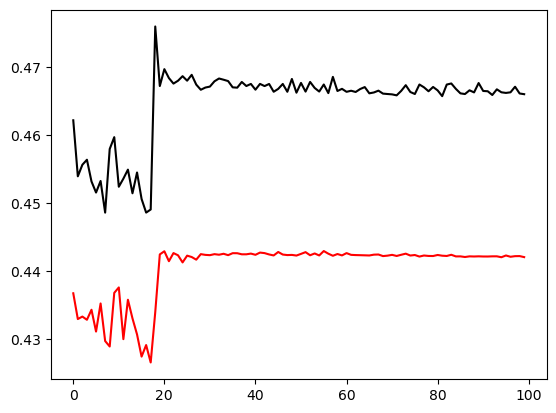

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history["loss"],color="red")
plt.plot(history.history["val_loss"],color="black")


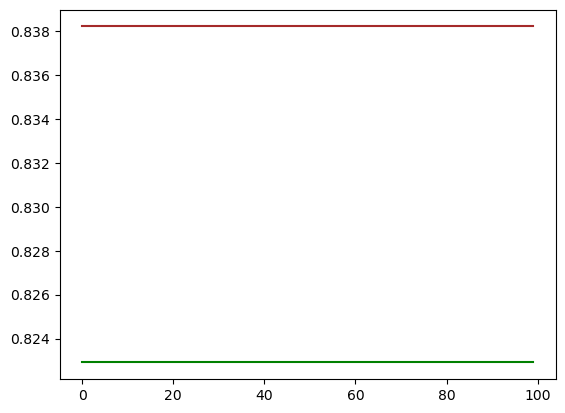

In [119]:
plt.plot(history.history["accuracy"],color="brown")
plt.plot(history.history["val_accuracy"],color="green")